In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df=pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


RestingBP- Blood pressure measurement taken when your heart is at rest==>high blood pressure is 140/90 or higher

Cholesterol- Normal total cholesterol: < 200 mg/dL== igh: 240+ mg/dL == Heterozygous FH: Cholesterol can be 300–600 mg/dL== Homozygous FH (rare, severe): Can be 600–1000+ mg/dL

FastingBS - Fasting Blood Sugar-70–99 mg/dL	Normal 

MaxHR - Maximum Heart Rate — it's the highest number of beats per minute (bpm) == MaxHR < 70 bpm is not normal and may signal a medical issue

Oldpeak -  Oldpeak = ST depression during stress ECG=== Range: Typically from 0 to around 6, but > 2.0 is considered high risk


ChestPainType-0 – Typical Angina: Clearly heart-related (serious)
                1 – Atypical Angina: Possibly heart-related
                2 – Non-anginal: Probably not heart-related
                3 – Asymptomatic: Silent heart issue, most dangerous as there are no warning signs

RestingECG-RestingECG (Resting Electrocardiogram) refers to the ECG results taken while the person is at rest
           0 – Normal: Healthy heart signals
            1 – ST-T abnormality: Possible heart stress or blockage
            2 – LVH: Heart muscle overgrowth; heart working harder than normal

ExerciseAngina -  exercise or physical activity==No – No chest pain during exercise (normal)
                                                Yes – Chest pain during exercise (abnormal)

ST_Slope - shape or direction of the ST segment on an electrocardiogram
Upsloping ST Segment
Horizontal ST Segment-Flat ST segment
Downsloping ST Segment

In [75]:
df.shape

(918, 12)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [77]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [78]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# NULL VALUES HANDLING

In [79]:
# NO NULL Values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [80]:
#df.corr() -heat map
corr2=df[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]].corr()
corr2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


# OUTLIERS HANDLING

OUTLIERS HANDLING
outliers only for Numerical columns not for categorical
1.Boxplot-outliers is there or not
2.Distribution - Handling method
  Normaldistribution - Z-score
  Skewness- Winsorization
3.Recheck the outliers

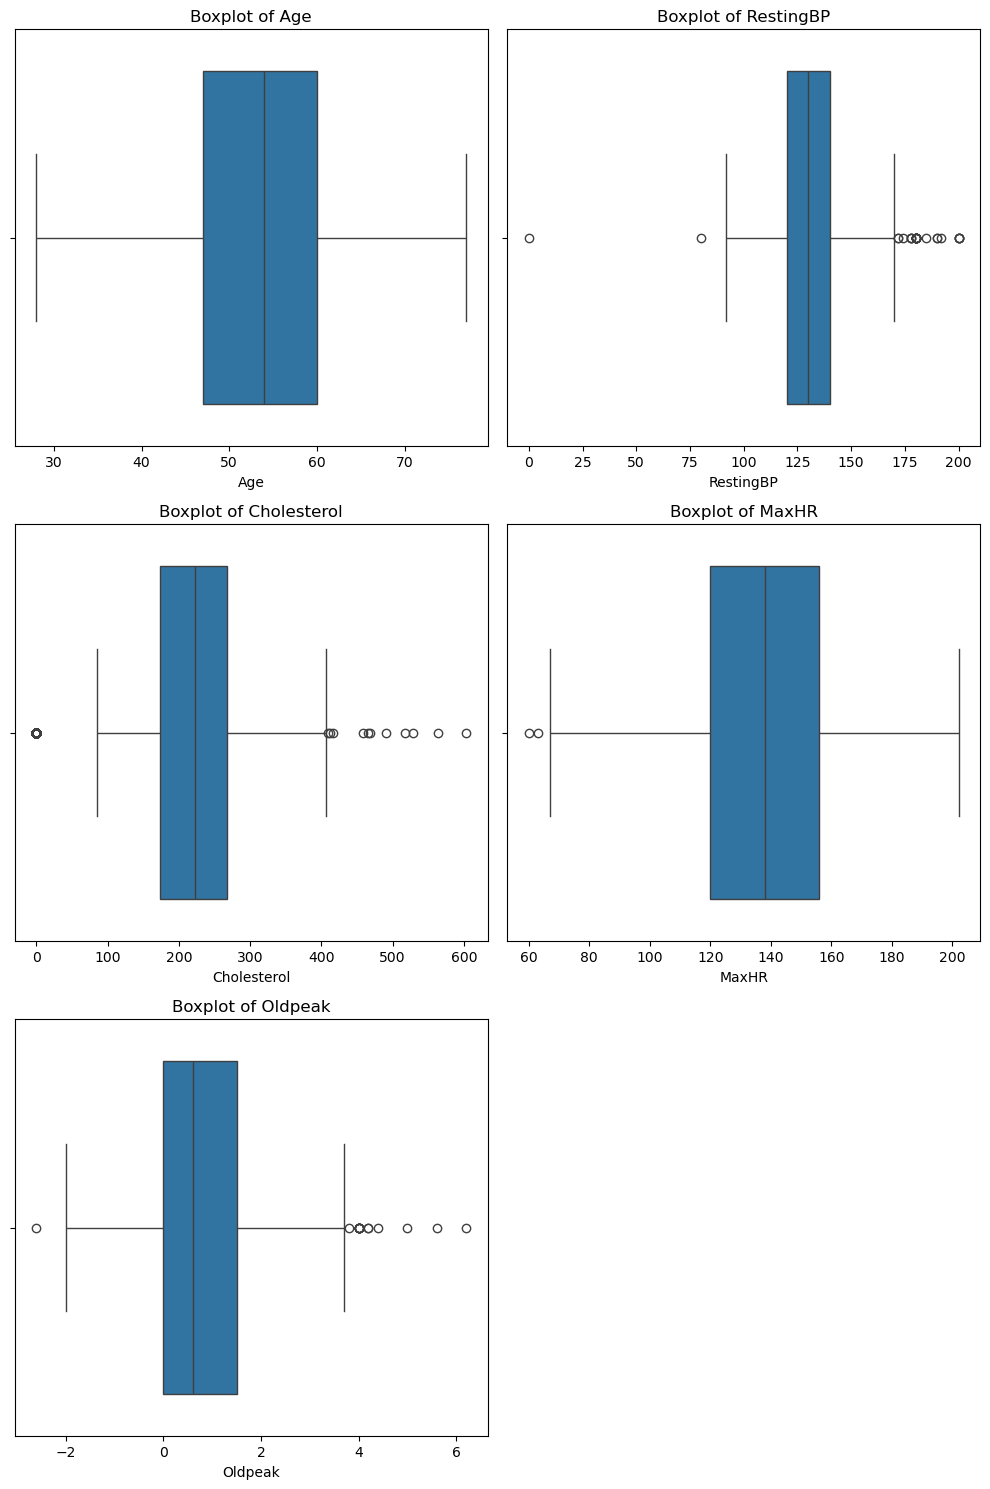

In [81]:
#sns.boxplot(x="RestingBP",data=df)

columns_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
n = len(columns_to_plot)

# Set 2 columns per row
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5 * nrows))
axes = axes.flatten()

# Plot boxplots vertically (straight orientation)
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [82]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# FEATURE SELECTION

In [83]:
#df.corr()
corr2=df[["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]].corr()
corr2

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


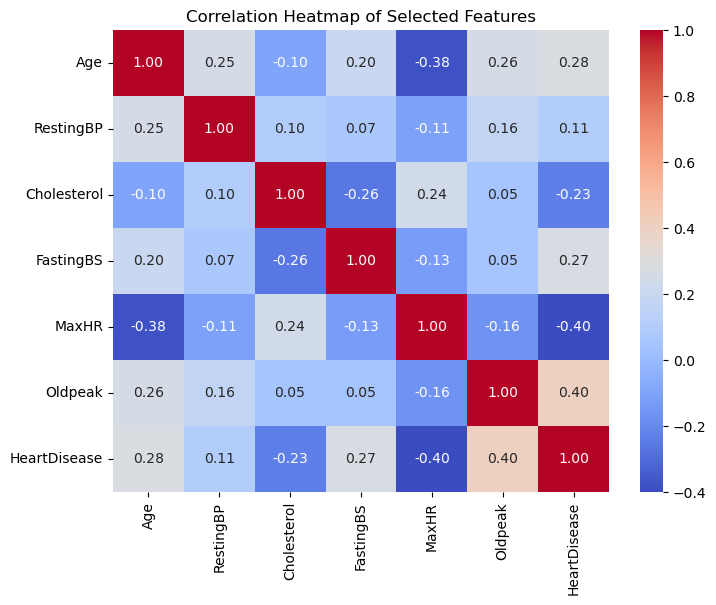

In [84]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr2, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

Hypothesis Testing

In [85]:
df["Sex"].unique()

array(['M', 'F'], dtype=object)

In [86]:
df["ChestPainType"].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [87]:
df["RestingECG"].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [88]:
df["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [89]:
df["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [90]:
#discreate,categorical data ==> Chi Square Test

from scipy.stats import chi2_contingency

# Assuming 'df' is your DataFrame

# List of categorical columns to test with 'HeartDisease'
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Perform Chi-Square Test for each categorical column against 'HeartDisease'
for col in categorical_cols:
    # Create the contingency table between the categorical column and 'HeartDisease'
    table = pd.crosstab(df[col], df['HeartDisease'])
    
    # Perform the Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(table)
    
    # Print the result
    print(f"Chi-Square Test between {col} and HeartDisease")
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"P-value: {p_val :.4f}")
    
    # Interpretation of the p-value
    if p_val < 0.05:
        print(f"There is a significant association between {col} and HeartDisease.")
    else:
        print(f"There is no significant association between {col} and HeartDisease.")
    
    print("\n" + "="*50 + "\n")

Chi-Square Test between Sex and HeartDisease
Chi-Square Statistic: 84.14510134633775
P-value: 0.0000
There is a significant association between Sex and HeartDisease.


Chi-Square Test between ChestPainType and HeartDisease
Chi-Square Statistic: 268.06723902181767
P-value: 0.0000
There is a significant association between ChestPainType and HeartDisease.


Chi-Square Test between FastingBS and HeartDisease
Chi-Square Statistic: 64.3206790933594
P-value: 0.0000
There is a significant association between FastingBS and HeartDisease.


Chi-Square Test between RestingECG and HeartDisease
Chi-Square Statistic: 10.931469339140978
P-value: 0.0042
There is a significant association between RestingECG and HeartDisease.


Chi-Square Test between ExerciseAngina and HeartDisease
Chi-Square Statistic: 222.25938271530583
P-value: 0.0000
There is a significant association between ExerciseAngina and HeartDisease.


Chi-Square Test between ST_Slope and HeartDisease
Chi-Square Statistic: 355.91844319207905

# ENCODING

In [91]:
from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()

df["Sex"]=encoder.fit_transform(df[["Sex"]])
df["ChestPainType"]=encoder.fit_transform(df[["ChestPainType"]])
df["RestingECG"]=encoder.fit_transform(df[["RestingECG"]])
df["ExerciseAngina"]=encoder.fit_transform(df[["ExerciseAngina"]])
df["ST_Slope"]=encoder.fit_transform(df[["ST_Slope"]])
print(encoder.categories_)

[array(['Down', 'Flat', 'Up'], dtype=object)]


In [92]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0,1


In [93]:
x=df.iloc[:, :-1] #All columns except the last (Except Target)

y=df.iloc[:, -1] #The last column (Target)

In [94]:
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264,0,1.0,132,0.0,1.2,1.0
914,68,1.0,0.0,144,193,1,1.0,141,0.0,3.4,1.0
915,57,1.0,0.0,130,131,0,1.0,115,1.0,1.2,1.0
916,57,0.0,1.0,130,236,0,0.0,174,0.0,0.0,1.0


In [95]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Handle Imbalance dataset

In [97]:
y_train.value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

In [98]:
# Initialize SMOTE with a random state for reproducibility
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Fit and transform the training data
x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

# Check the new class distribution
print(pd.Series(y_train_balanced).value_counts())

HeartDisease
0    401
1    401
Name: count, dtype: int64


# Scaling 

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train_balanced)
x_train_scaled

x_test_scaled=scaler.transform(x_test)

# Logistic Regression Model

In [100]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1, max_iter=10, penalty='l1',solver= 'liblinear')
model

LogisticRegression(C=1, max_iter=10, penalty='l1', solver='liblinear')

In [101]:
model.fit(x_train_scaled,y_train_balanced)

LogisticRegression(C=1, max_iter=10, penalty='l1', solver='liblinear')

In [102]:
y_pred=model.predict(x_test_scaled)

In [103]:
#training accuracy
from sklearn.metrics import accuracy_score
print ("Accuracy is "), accuracy_score(y_test,y_pred)*100

Accuracy is 


(None, 83.69565217391305)

In [104]:
#testing accuracy

y2_pred=model.predict(x_train_scaled)
print ("Accuracy is "), accuracy_score(y_train_balanced,y2_pred)*100

Accuracy is 


(None, 85.16209476309227)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create base model
log_model = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # 'liblinear' supports both l1 and l2
    'max_iter': [100, 200, 500]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(x_train_scaled, y_train_balanced)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [106]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      1.00      0.60        77
           1       1.00      0.04      0.07       107

    accuracy                           0.44       184
   macro avg       0.71      0.52      0.34       184
weighted avg       0.76      0.44      0.29       184



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# SVM Model

In [107]:
from sklearn.svm import SVC  # support vector classification =because we using classification
model=SVC(kernel="rbf",C=1,gamma='scale') #Rgularization-> parameters=kernel,c(kernel,c=10 r 1)
model

SVC(C=1)

In [108]:
final=model.fit(x_train_scaled,y_train_balanced)
final

SVC(C=1)

In [134]:
#training accuracy

y_pred2=model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy * 100 :2f}%")

Accuracy: 87.500000%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [135]:
#testing accuracy

y2_pred=model.predict(x_train_scaled)
print ("Accuracy is "), accuracy_score(y_train_balanced,y2_pred)*100

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy is 


(None, 50.374064837905244)

In [136]:
#hyperparameter tunning(beore testing we can find accuracy which is the best)-cross validation(CV)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

grid_search.fit(x_train_scaled, y_train_balanced)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [112]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60        77
           1       1.00      0.04      0.07       107

    accuracy                           0.44       184
   macro avg       0.71      0.52      0.34       184
weighted avg       0.76      0.44      0.29       184



# KNN

In [113]:
#To find K
import math
math.sqrt(len(y_test))

13.564659966250536

In [114]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(metric = 'manhattan', n_neighbors = 11, weights = 'distance')

In [115]:
model.fit(x_train_scaled,y_train_balanced)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

In [116]:
y_pred=model.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred)*100)

88.58695652173914


In [117]:
y2_pred=model.predict(x_train_scaled)
print(accuracy_score(y_train_balanced,y2_pred)*100)

100.0


In [118]:
#hyperparameter tunning(beore testing we can find accuracy which is the best)-cross validation(CV)

from sklearn.model_selection import GridSearchCV
param_grid= {
    'n_neighbors': [3, 5, 7, 9, 11],       # Number of neighbors
    'weights': ['uniform', 'distance'],   # Weight function
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid_search.fit(x_train_scaled, y_train_balanced)

print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [119]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



# DECISION TREE

In [120]:
# Use without scaling 
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=4, max_features=None, max_depth=5, criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [121]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)

87.5


In [122]:
y2_pred=model.predict(x_train)
print(accuracy_score(y_train,y2_pred)*100)

88.69209809264305


In [123]:
#hyperparameter tunning(beore testing we can find accuracy which is the best)-cross validation(CV)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define parameter distributions for Randomized Search
param_dist = {
     'criterion': ['gini', 'entropy', 'log_loss'],      # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],                # Max depth of tree
    'min_samples_split': [2, 5, 10],                   # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],                     # Min samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']             # Number of features to consider at each split

}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # You can increase this for more exploration
    cv=5,
    random_state=42
)

# Fit on training data
random_search.fit(x_train, y_train)

# Print the best parameters found
print("Best parameters:", random_search.best_params_)

Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 5, 'criterion': 'gini'}


In [153]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize XGBoost Classifier (uses trees by default)
xgb_clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train model
xgb_clf.fit(x_train, y_train)

# Predict
y_pred = xgb_clf.predict(x_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ModuleNotFoundError: No module named 'xgboost'

In [124]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



# RANDOM FOREST

In [125]:
# Use without scaling 
from sklearn.ensemble import  RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_features='sqrt', max_depth=20, random_state=42, min_samples_split = 5, min_samples_leaf = 1, criterion = 'gini')
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [126]:
accuracy = model.score(x_test, y_test)*100
print("Model Accurcy:",accuracy)

Model Accurcy: 89.13043478260869


In [127]:
accuracy1 = model.score(x_train, y_train)*100
print("Model Accurcy:",accuracy1)

Model Accurcy: 97.41144414168937


Hyperparameter Tunning

In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


param_dist = {'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],            # Max depth of each tree
    'min_samples_split': [2, 5, 10],            # Min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],              # Min samples required at leaf node
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider at each split
    'criterion': ['gini', 'entropy']            # Function to measure quality of a split
            }
    
rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,n_iter=5, cv=5,verbose=1, n_jobs=-1)

rand_search.fit(x_train, y_train)
print("Best Hyperparameters:")
print(rand_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\s

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}


In [129]:
from sklearn.metrics import confusion_matrix, classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



KNN and  Random Forest is overfitting